# AutoAge Dataset Creation
In this notebook, we create TS from the AutoAge data archive.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [15]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
import wfdb
import os
sys.path.append("../../")

from scipy import signal
from tqdm import tqdm
from src.visualizer import plot_ts

First, we need to download the PhysioNet record and annotation from https://physionet.org/content/autonomic-aging-cardiovascular/1.0.0/.

In [36]:
subject = 1

In [37]:
rec = wfdb.rdrecord(f"000{subject}", pn_dir='autonomic-aging-cardiovascular') 

In [41]:
signal = 0

name = f"AutoAge_{rec.sig_name[signal]}_Subject{subject}"
ts = rec.p_signal[:,signal]
cps = np.zeros(0, dtype=np.int64)

['ECG1', 'ECG2', 'NIBP']

Let's visualise the TS.

<Figure size 432x288 with 0 Axes>

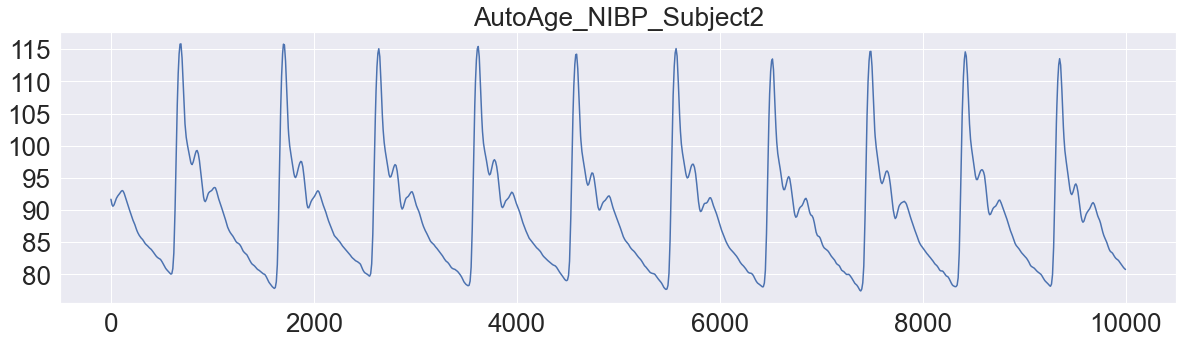

In [42]:
plot_ts(
    name,
    ts[:10_000],
    cps,
    show=True
)

Finally, let's save the TS dataset.

In [47]:
DATASET_PATH = "../../datasets/AutoAge/"

In [48]:
if not os.path.exists(DATASET_PATH):
    os.mkdir(DATASET_PATH)

In [52]:
records = pd.read_csv("https://physionet.org/files/autonomic-aging-cardiovascular/1.0.0/RECORDS", header=None, dtype=str)[0].to_numpy()

desc = []
data = dict()
signal = 1
window_size = 1000

for subject in tqdm(records[:10]):
    rec = wfdb.rdrecord(f"{subject}", pn_dir='autonomic-aging-cardiovascular') 
    for signal in range(len(rec.sig_name)):
        name = f"AutoAge_{rec.sig_name[signal]}_Subject{subject}"
        ts = rec.p_signal[:,signal]
        cps = np.zeros(0, dtype=np.int64)

        desc.append(f"{name},{window_size},{','.join(dp.map(str, cps))}")
        data[name] = ts
            
np.savetxt(f"{DATASET_PATH}desc.txt", desc, fmt="%s")
np.savez(f"{DATASET_PATH}data.npz", **data)

100%|███████████████████████████████████████████| 10/10 [01:17<00:00,  7.78s/it]
